In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

from Utils import PlotUtils

In [2]:
df = pd.read_csv('./Dataset/processed_creditcard.csv')
df.drop('Time', axis=1, inplace=True)
features = df.drop('Class', axis=1).values
y = df['Class'].values

x_train, x_test, y_train, y_test = train_test_split(
    features,
    y,
    test_size=0.2,
    random_state=0
)

In [3]:
model = RandomForestClassifier(
    n_estimators = 100,
    criterion = "entropy",
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0,
    max_features = "auto",
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
    bootstrap = True,
    oob_score = False,
    n_jobs = 4,
    random_state = None,
    verbose = 0,
    warm_start = False,
    class_weight = "balanced_subsample",
    ccp_alpha = 0.0,
    max_samples = None
)

In [4]:
model.fit(
    x_train,
    y_train
)

# Serialization
dump(model, './Model/model.joblib')

['./Model/model.joblib']

In [5]:
predictions = model.predict(x_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy : ' + str(acc))
print('F1 Score : ' + str(f1))

Accuracy : 0.968421052631579
F1 Score : 0.963855421686747


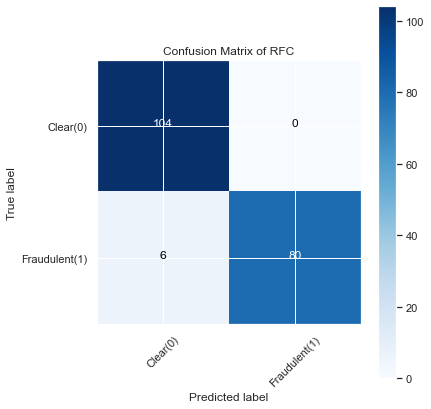

In [6]:
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=[0, 1])
plt.rcParams['figure.figsize'] = (6, 6)

PlotUtils.plot_confusion_matrix(
    cm,
    classes=['Clear(0)', 'Fraudulent(1)'],
    normalize=False,
    title='RFC'
)